### Importing modules

In [1]:
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import ttest_ind
from rdpclient import apiget_flights_all

# 1. Sending a query to Radiation Portal and processing outgoing JSON

In [2]:
indata = apiget_flights_all()

# 2. Understanding the properties of high-proton flights

In [3]:
prop_sxrflux = np.array(indata["b_avg_max"], dtype=float)
prop_pflux = np.array(indata["zpgt10_max"], dtype=float)
prop_ratio = np.array(indata["ARMAS_NAIRAS_flight_ratio"], dtype=float)
prop_L4ARMAS = np.array(indata["L4_median_flight_derived_effective_dose_rate_dEdt"], dtype=float)
prop_starttime = np.array(indata["Data_start_time_proc"])
prop_endtime = np.array(indata["Data_end_time_proc"])
prop_lonmin = np.array(indata["longitude_min"], dtype=float)
prop_lonmax = np.array(indata["longitude_max"], dtype=float)
prop_latmin = np.array(indata["latitude_min"], dtype=float)
prop_latmax = np.array(indata["latitude_max"], dtype=float)
prop_medalt = np.array(indata["Flight_median_altitude_nearcruise"], dtype=float)*1000.0

In [4]:
# fixing parameters
prop_pflux[np.where(np.isnan(prop_pflux))] = -1.0
prop_ratio[np.where(np.isnan(prop_ratio))] = -1.0
prop_L4ARMAS[np.where(np.isnan(prop_L4ARMAS))] = -1.0
prop_sxrflux[np.where(np.isnan(prop_sxrflux))] = -1.0
indexes_highp = np.where(prop_pflux > 10.0)
print "Flight times:", prop_starttime[indexes_highp]
print "Flight longitudes (min):", prop_lonmin[indexes_highp]
print "Flight longitudes (max):", prop_lonmax[indexes_highp]
print "Flight latitudes (min):", prop_latmin[indexes_highp]
print "Flight latitudes (max):", prop_latmax[indexes_highp]
print "Flight median altitudes:", prop_medalt[indexes_highp]
print "Flight doses:", prop_L4ARMAS[indexes_highp]

Flight times: [u'2017-09-04 16:20:00' u'2017-09-05 16:43:49' u'2017-09-06 16:32:10'
 u'2017-09-07 01:32:49' u'2017-09-08 04:34:00' u'2017-09-08 20:01:30']
Flight longitudes (min): [-64.1 -68.  -79.9 -85.4 -85.3 -85.5]
Flight longitudes (max): [-51.5 -56.7 -59.5 -65.8 -71.2 -73.3]
Flight latitudes (min): [13.  13.  13.  17.  18.9 19.4]
Flight latitudes (max): [28.5 29.8 26.4 27.9 29.  27.9]
Flight median altitudes: [14100. 14000. 14100. 14100. 14100. 14400.]
Flight doses: [ 0.    8.93 10.46 11.62 10.98 11.63]


#### Let us provide some summary of the flights:
1. The flights happened in September 4-8, 2017
2. The flight longitudes ranged from -85.5 to -51.5
3. The flight latitudes ranged from 13.0 to 29.0
4. The median altitudes were 13.8 km to 14.4 km

Let us search how many flights else happened in September 6, 2016 - September 6, 2018, and occurred in the longitude range of (-95.5;-41.5), the latitude range of (3.0;39.0), and having median altitudes of (13100;15100).

# 3. Studying the properties of the same-region flights and determining the significance in measurement differences between two groups

In [5]:
indexes_lowp = np.where(( (prop_lonmin > -95.5) & (prop_lonmax < -41.5) & (prop_latmin > 3.0) & (prop_latmax < 39.0) & \
                       (prop_medalt > 13100.0) & (prop_medalt < 15100.0) & \
                       (prop_starttime > '2016-09-06 00:00:00') & (prop_starttime < '2018-09-06 00:00:00') & \
                       (prop_pflux < 10.0) ))
print indexes_lowp

(array([198, 199, 200, 201, 204, 205, 206, 208, 209, 210, 212, 213, 243,
       247, 342, 349, 350, 352, 353, 354, 360, 362, 363, 391, 474, 479,
       505, 506, 533], dtype=int64),)


In [6]:
print prop_ratio[indexes_highp]
print prop_ratio[indexes_lowp]
print "Student's t-test:", ttest_ind(prop_ratio[indexes_highp], prop_ratio[indexes_lowp], equal_var=True, nan_policy='omit')
print "Welch's t-test:", ttest_ind(prop_ratio[indexes_highp], prop_ratio[indexes_lowp], equal_var=False, nan_policy='omit')

[148.75      2.22019   2.11277   2.11536   1.80764   2.03184]
[346.659    41.9056   10.0598    1.54926   1.85492   1.77955   1.86706
   1.81909   1.8099    1.44964   1.49695   1.64852   1.43887   2.1246
   2.49455   1.88768   1.85138   1.83514   2.00562   2.15519   2.15601
   2.35156   1.9198    1.88075  73.8282    1.82418  27.0856   26.9385
   2.10556]
Student's t-test: Ttest_indResult(statistic=0.23842323746478908, pvalue=0.8130272086515219)
Welch's t-test: Ttest_indResult(statistic=0.251643676524937, pvalue=0.8079510134469001)


In [7]:
print prop_L4ARMAS[indexes_highp][1:]
print prop_L4ARMAS[indexes_lowp]
print "Student's t-test:", ttest_ind(prop_ratio[indexes_highp][1:], prop_ratio[indexes_lowp], equal_var=True, nan_policy='omit')
print "Welch's t-test:", ttest_ind(prop_L4ARMAS[indexes_highp][1:], prop_L4ARMAS[indexes_lowp], equal_var=False, nan_policy='omit')

[ 8.93 10.46 11.62 10.98 11.63]
[245.92 458.06  10.12   9.66   9.31  10.25  10.66  10.22  11.08  11.43
  12.7   14.65   9.8   15.27   9.72  11.16  11.01  15.3    9.3    9.24
  10.53  12.83  11.86  15.15  16.63  15.94 128.46  16.76  15.88]
Student's t-test: Ttest_indResult(statistic=-0.5986374747106027, pvalue=0.5536289751176369)
Welch's t-test: Ttest_indResult(statistic=-1.6616739105429144, pvalue=0.10771749163687447)


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log10
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: divide by zero encountered in log10


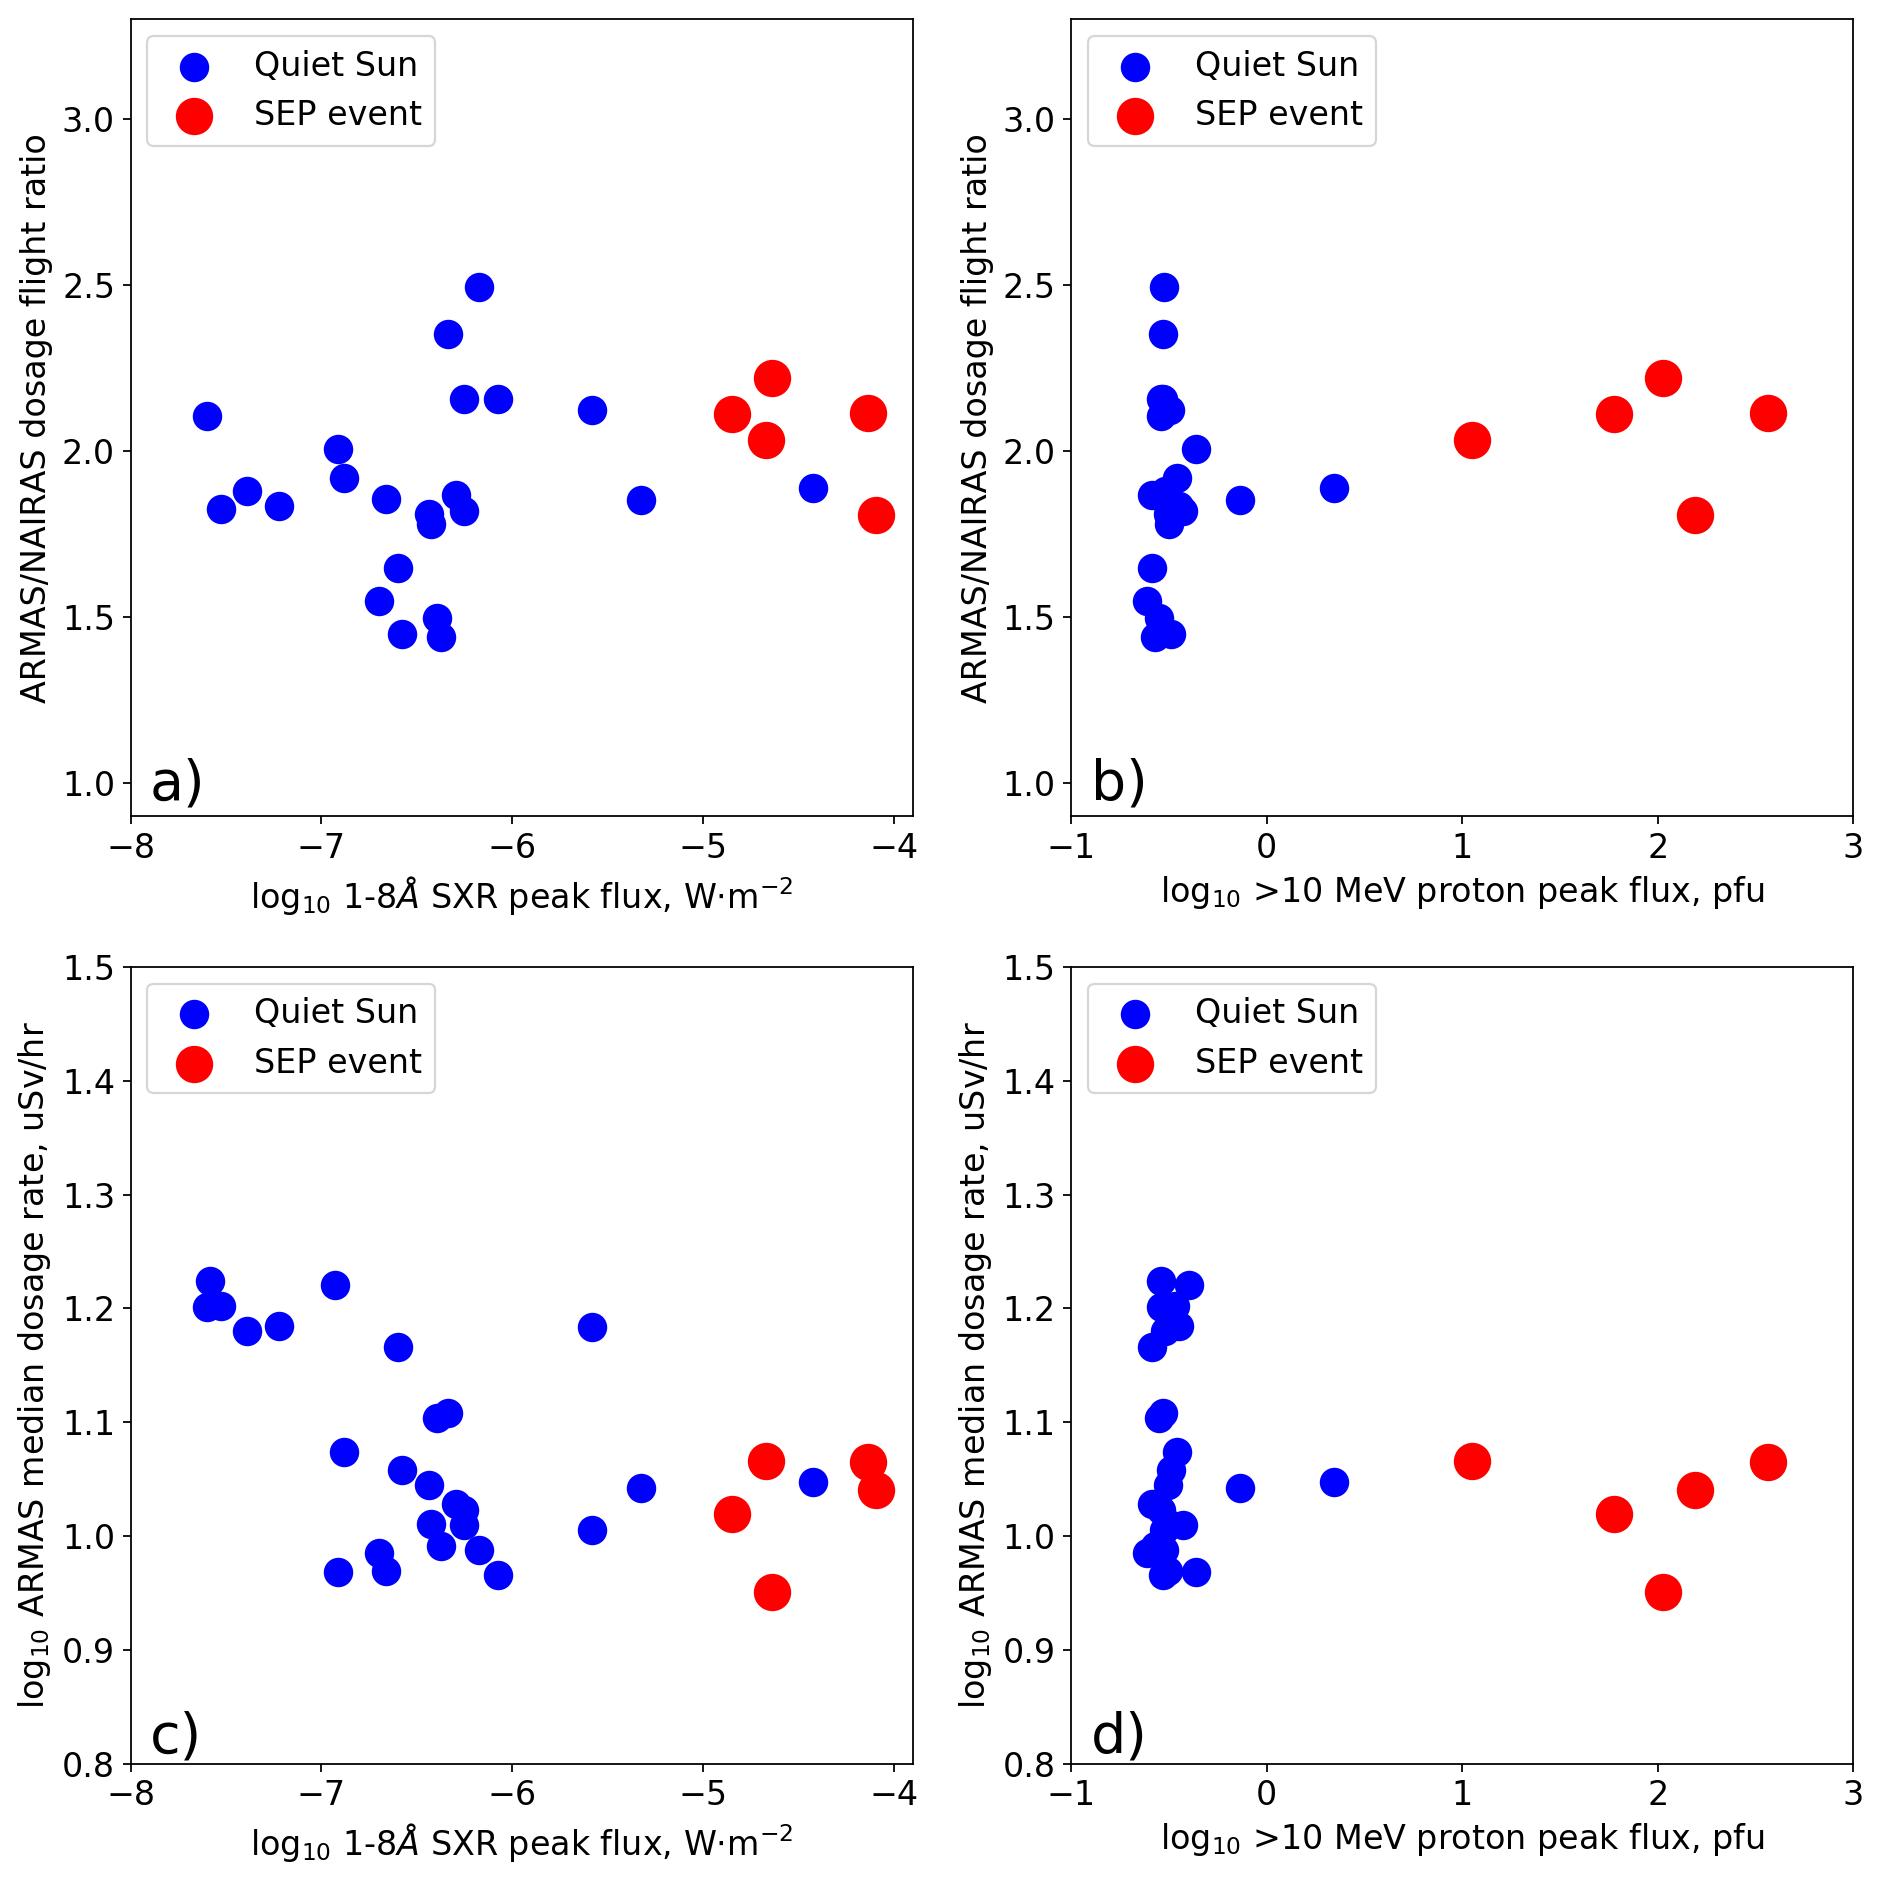

In [8]:
matplotlib.rcParams.update({'font.size':15})
im, ax = plt.subplots(2,2,figsize=(12,12),dpi=160)

ax[0,0].scatter(prop_sxrflux[indexes_lowp],prop_ratio[indexes_lowp], color='blue', alpha=1.0, s=150, label='Quiet Sun')
ax[0,0].scatter(prop_sxrflux[indexes_highp],prop_ratio[indexes_highp], color='red', alpha=1.0, s=250, label='SEP event')
ax[0,0].set(xlabel='log$_{10}$ 1-8$\AA$ SXR peak flux, W$\cdot$m$^{-2}$', \
          ylabel='ARMAS/NAIRAS dosage flight ratio', ylim=[0.9,3.3], xlim=[-8,-3.9])
ax[0,0].text(-7.9, 0.95, 'a)', fontsize=25)
ax[0,0].legend(loc=2)

ax[0,1].scatter(np.log10(prop_pflux[indexes_lowp]),prop_ratio[indexes_lowp], color='blue', alpha=1.0, s=150, label='Quiet Sun')
ax[0,1].scatter(np.log10(prop_pflux[indexes_highp]),prop_ratio[indexes_highp], color='red', alpha=1.0, s=250, label='SEP event')
ax[0,1].set(xlabel='log$_{10}$ >10 MeV proton peak flux, pfu', \
          ylabel='ARMAS/NAIRAS dosage flight ratio', ylim=[0.9,3.3], xlim=[-1,3])
ax[0,1].text(-0.9, 0.95, 'b)', fontsize=25)
ax[0,1].legend(loc=2)

ax[1,0].scatter(prop_sxrflux[indexes_lowp],np.log10(prop_L4ARMAS[indexes_lowp]), color='blue', alpha=1.0, s=150, label='Quiet Sun')
ax[1,0].scatter(prop_sxrflux[indexes_highp],np.log10(prop_L4ARMAS[indexes_highp]), color='red', alpha=1.0, s=250, label='SEP event')
ax[1,0].set(xlabel='log$_{10}$ 1-8$\AA$ SXR peak flux, W$\cdot$m$^{-2}$', ylabel='log$_{10}$ ARMAS median dosage rate, uSv/hr', \
            ylim=[0.8,1.5], xlim=[-8,-3.9])
ax[1,0].text(-7.9, 0.81, 'c)', fontsize=25)
ax[1,0].legend(loc=2)

ax[1,1].scatter(np.log10(prop_pflux[indexes_lowp]),np.log10(prop_L4ARMAS[indexes_lowp]), color='blue', alpha=1.0, s=150, label='Quiet Sun')
ax[1,1].scatter(np.log10(prop_pflux[indexes_highp]),np.log10(prop_L4ARMAS[indexes_highp]), color='red', alpha=1.0, s=250, label='SEP event')
ax[1,1].set(xlabel='log$_{10}$ >10 MeV proton peak flux, pfu', ylabel='log$_{10}$ ARMAS median dosage rate, uSv/hr', \
            ylim=[0.8,1.5], xlim=[-1,3])
ax[1,1].text(-0.9, 0.81, 'd)', fontsize=25)
ax[1,1].legend(loc=2)

plt.tight_layout()
plt.savefig('ARMASNAIRAS_vs_fluxes_v10.20.eps')
plt.savefig('ARMASNAIRAS_vs_fluxes_v10.20.png')
plt.show()
plt.close()

In [9]:
indexes_allp = np.where(( (prop_lonmin > -95.5) & (prop_lonmax < -41.5) & (prop_latmin > 3.0) & (prop_latmax < 39.0) & \
                       (prop_medalt > 13100.0) & (prop_medalt < 15100.0) & \
                       (prop_starttime > '2016-09-06 00:00:00') & (prop_starttime < '2018-09-06 00:00:00') ))

In [10]:
print "For ratios:"
print "SXR Kendall tau:", kendalltau(prop_sxrflux[indexes_allp], prop_ratio[indexes_allp])
print "Pflux Kendall tau:", kendalltau(prop_pflux[indexes_allp], prop_ratio[indexes_allp])

For ratios:
SXR Kendall tau: KendalltauResult(correlation=0.038655462184873944, pvalue=0.7439455285232186)
Pflux Kendall tau: KendalltauResult(correlation=0.1495798319327731, pvalue=0.20625606734135338)


In [11]:
indexes_allp = np.where(( (prop_lonmin > -95.5) & (prop_lonmax < -41.5) & (prop_latmin > 3.0) & (prop_latmax < 39.0) & \
                       (prop_medalt > 13100.0) & (prop_medalt < 15100.0) & \
                       (prop_starttime > '2016-09-06 00:00:00') & (prop_starttime < '2018-09-06 00:00:00') ))
print "SXR Kendall tau:", kendalltau(prop_sxrflux[indexes_allp], prop_L4ARMAS[indexes_allp])
print "Pflux Kendall tau:", kendalltau(prop_pflux[indexes_allp], prop_L4ARMAS[indexes_allp])

SXR Kendall tau: KendalltauResult(correlation=-0.334453781512605, pvalue=0.00471207615645784)
Pflux Kendall tau: KendalltauResult(correlation=-0.015126050420168069, pvalue=0.898297050215243)


In [12]:
print prop_pflux[indexes_highp]

[ 13.0484 106.07    59.6425 364.855  154.125   11.2305]
